# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
output_dir = output_data_file.split('/')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = [] #?? get country code from citipy? 

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#create url
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_keys.api_key}&q={city}&units={units}"

In [5]:
# loop thru all cities, check if city can be found in openweathermap
# if found, add city to bucket set; if not found, skip and continue
# OpenWeatherMap free account allows 60 calls/min, 
# request 50 cities at a time, wait 55secs then continue loop

city = []       #response["name"]
cloudiness = [] #response["clouds"]["all"]
country = []    #response["sys"]["country"]
date = []       #response["dt"]
humidity = []   #response["main"]["humidity"]
lat = []        #response["coord"]["lat"]
lng = []        #response["coord"]["lon"]
max_temp = []   #response["main"]["temp_max"]
wind_speed = [] #response["wind"]["speed"]
city_not_found = []
sleep_interval = 0

basket_counter = 1
city_counter = 0

newline = '\n'
first_line = "Beginning Data Retrieval"
last_line = "Data Retrieval Complete"
just_line = "-------------------------------------"
not_found = "City not found... Skipping"
print(first_line)
print(just_line)
output_log = os.path.join(output_dir[0], "output_log.txt")
with open(output_log, 'w', newline='') as logfile:
    logfile.write(first_line + newline)
    logfile.write(just_line + newline)
    
    start_time = time.time()
    
    for x in range(len(cities)):

        query_url = f"{url}appid={api_keys.api_key}&q={cities[x]}&units={units}"
        
        response = requests.get(query_url).json()

        try:
            city.append(response["name"])

            try:
                country.append(response["sys"]["country"])
                date.append(response["dt"])
                humidity.append(response["main"]["humidity"])
                lat.append(response["coord"]["lat"])
                lng.append(response["coord"]["lon"])
                max_temp.append(response["main"]["temp_max"])
                wind_speed.append(response["wind"]["speed"])
                cloudiness.append(response["clouds"]["all"])

                city_counter += 1
                process_msg = f"Processing Record {city_counter} of Set {basket_counter} | {cities[x]}"
                print(process_msg)
                print(query_url)
                logfile.write(process_msg + newline)
                logfile.write(query_url + newline)
                
                if (len(city) % 50) == 0:
                    sleep_interval = time.time() - start_time
                    basket_counter += 1
                    city_counter = 0
                    time.sleep(60 - sleep_interval)
                    start_time = time.time()

            except:
                process_msg = "Other error."
                print(process_msg)
                logfile.write(process_msg + newline)
                pass

        except:
            process_msg = f"{not_found} {cities[x]}"
            print(process_msg)
            logfile.write(process_msg + newline)
            city_not_found.append(cities[x])
            pass

    logfile.write(just_line + newline)
    logfile.write(last_line + newline)
    logfile.write(just_line + newline)


Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | gorom-gorom
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=gorom-gorom&units=imperial
Processing Record 2 of Set 1 | avarua
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=avarua&units=imperial
Processing Record 3 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=mataura&units=imperial
Processing Record 4 of Set 1 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=mahebourg&units=imperial
Processing Record 5 of Set 1 | sorong
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=sorong&units=imperial
Processing Record 6 of Set 1 | tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=tuatapere&units=imperial
Processing Record 7 of Se

Processing Record 3 of Set 2 | tangjiazhuang
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=tangjiazhuang&units=imperial
Processing Record 4 of Set 2 | santa maria
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=santa maria&units=imperial
Processing Record 5 of Set 2 | novyy urengoy
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=novyy urengoy&units=imperial
City not found... Skipping samusu
Processing Record 6 of Set 2 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=bluff&units=imperial
Processing Record 7 of Set 2 | abu samrah
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=abu samrah&units=imperial
Processing Record 8 of Set 2 | nishihara
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=nishihara&units=imperial
Processing Record 9 of Set 2

Processing Record 6 of Set 3 | isangel
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=isangel&units=imperial
Processing Record 7 of Set 3 | sistranda
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=sistranda&units=imperial
Processing Record 8 of Set 3 | kuching
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=kuching&units=imperial
Processing Record 9 of Set 3 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ilulissat&units=imperial
Processing Record 10 of Set 3 | faanui
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=faanui&units=imperial
Processing Record 11 of Set 3 | sola
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=sola&units=imperial
Processing Record 12 of Set 3 | calvinia
http://api.openweathermap.org/data/2.5/weather?appid=a967

Processing Record 10 of Set 4 | aketi
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=aketi&units=imperial
Processing Record 11 of Set 4 | touros
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=touros&units=imperial
Processing Record 12 of Set 4 | port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=port lincoln&units=imperial
Processing Record 13 of Set 4 | rengo
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=rengo&units=imperial
Processing Record 14 of Set 4 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=butaritari&units=imperial
Processing Record 15 of Set 4 | port macquarie
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=port macquarie&units=imperial
Processing Record 16 of Set 4 | brokopondo
http://api.openweathermap.org/d

City not found... Skipping jubayl
Processing Record 14 of Set 5 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=saint-philippe&units=imperial
Processing Record 15 of Set 5 | yumen
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=yumen&units=imperial
Processing Record 16 of Set 5 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=los llanos de aridane&units=imperial
Processing Record 17 of Set 5 | sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=sinnamary&units=imperial
Processing Record 18 of Set 5 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=severo-kurilsk&units=imperial
Processing Record 19 of Set 5 | ndola
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ndola&units=imperial
Processi

Processing Record 16 of Set 6 | bonavista
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=bonavista&units=imperial
Processing Record 17 of Set 6 | college
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=college&units=imperial
Processing Record 18 of Set 6 | lompoc
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=lompoc&units=imperial
Processing Record 19 of Set 6 | itaguai
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=itaguai&units=imperial
Processing Record 20 of Set 6 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=kruisfontein&units=imperial
Processing Record 21 of Set 6 | ulladulla
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ulladulla&units=imperial
Processing Record 22 of Set 6 | florida
http://api.openweathermap.org/data/2.5

Processing Record 19 of Set 7 | wainwright
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=wainwright&units=imperial
Processing Record 20 of Set 7 | ouro fino
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ouro fino&units=imperial
Processing Record 21 of Set 7 | anadyr
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=anadyr&units=imperial
Processing Record 22 of Set 7 | mount pleasant
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=mount pleasant&units=imperial
Processing Record 23 of Set 7 | pisco
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=pisco&units=imperial
Processing Record 24 of Set 7 | jalu
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=jalu&units=imperial
Processing Record 25 of Set 7 | umm kaddadah
http://api.openweathermap.org/data/2.

Processing Record 23 of Set 8 | cairns
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=cairns&units=imperial
Processing Record 24 of Set 8 | lagos
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=lagos&units=imperial
Processing Record 25 of Set 8 | andenes
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=andenes&units=imperial
Processing Record 26 of Set 8 | zhangjiakou
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=zhangjiakou&units=imperial
Processing Record 27 of Set 8 | deniliquin
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=deniliquin&units=imperial
Processing Record 28 of Set 8 | campbellsville
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=campbellsville&units=imperial
Processing Record 29 of Set 8 | souillac
http://api.openweathermap.org/d

Processing Record 26 of Set 9 | vallenar
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=vallenar&units=imperial
Processing Record 27 of Set 9 | disna
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=disna&units=imperial
Processing Record 28 of Set 9 | svetlyy
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=svetlyy&units=imperial
Processing Record 29 of Set 9 | pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=pacific grove&units=imperial
Processing Record 30 of Set 9 | grindavik
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=grindavik&units=imperial
City not found... Skipping kamenskoye
Processing Record 31 of Set 9 | macae
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=macae&units=imperial
Processing Record 32 of Set 9 | sobolevo
http:

Processing Record 29 of Set 10 | muisne
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=muisne&units=imperial
Processing Record 30 of Set 10 | imeni zhelyabova
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=imeni zhelyabova&units=imperial
Processing Record 31 of Set 10 | polis
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=polis&units=imperial
Processing Record 32 of Set 10 | roma
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=roma&units=imperial
Processing Record 33 of Set 10 | the village
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=the village&units=imperial
Processing Record 34 of Set 10 | bethanien
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=bethanien&units=imperial
Processing Record 35 of Set 10 | wuzhou
http://api.openweathermap.org/

Processing Record 32 of Set 11 | dwarka
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=dwarka&units=imperial
Processing Record 33 of Set 11 | oistins
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=oistins&units=imperial
Processing Record 34 of Set 11 | kasangulu
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=kasangulu&units=imperial
Processing Record 35 of Set 11 | gat
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=gat&units=imperial
Processing Record 36 of Set 11 | bosaso
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=bosaso&units=imperial
Processing Record 37 of Set 11 | guozhen
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=guozhen&units=imperial
Processing Record 38 of Set 11 | ishige
http://api.openweathermap.org/data/2.5/weather?appid=a96

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create city data frame
city_df = pd.DataFrame({"City" : city,
                       "Cloudiness" : cloudiness,
                       "Country" : country,
                       "Date" : date,
                       "Humidity" : humidity,
                       "Lat" : lat,
                       "Lng" : lng,
                       "Max Temp" : max_temp,
                       "Wind Speed" : wind_speed})

city_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [8]:
#export to csv file
output_file = os.path.join(output_dir[0], output_dir[1])
city_df.to_csv(output_file, index=True)

In [9]:
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gorom-Gorom,100,BF,1604462328,26,14.44,-0.24,81.00,7.05
1,Avarua,100,CK,1604461833,78,-21.21,-159.78,75.20,26.22
2,Mataura,42,NZ,1604461798,55,-46.19,168.86,66.99,8.01
3,Mahébourg,40,MU,1604461587,64,-20.41,57.70,73.40,8.05
4,Sorong,100,ID,1604462328,81,-0.88,131.25,82.36,11.39
...,...,...,...,...,...,...,...,...,...
558,Alihe,100,CN,1604462989,73,50.57,123.72,26.69,5.70
559,Port Moresby,40,PG,1604462989,62,-9.44,147.18,87.80,11.41
560,Lüderitz,8,NA,1604462586,95,-26.65,15.16,57.52,6.82
561,Hofn,100,IS,1604462989,63,64.25,-15.21,43.34,6.82


In [10]:
city_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,563.000000,5.630000e+02,563.000000,563.000000,563.000000,563.000000,563.000000
mean,50.857904,1.604463e+09,71.468917,18.694494,18.967567,58.236412,8.434885
std,40.167280,3.253102e+02,21.172239,33.701162,91.912566,22.929388,6.587985
min,0.000000,1.604461e+09,2.000000,-54.800000,-179.170000,-20.200000,0.200000
25%,3.500000,1.604462e+09,58.500000,-9.700000,-63.810000,44.600000,3.635000
50%,51.000000,1.604463e+09,77.000000,20.890000,22.700000,62.600000,6.930000
75%,90.000000,1.604463e+09,87.000000,47.780000,108.160000,77.090000,11.340000
max,100.000000,1.604463e+09,100.000000,78.220000,179.320000,100.400000,61.850000


**Remove cities where Humidity > 100%**  
Not necessary if there are no cities with Humidity > 100%

In [15]:
humid_cities = city_df["City"].loc[city_df["Humidity"] > 100].count()
if humid_cities > 0:
    city_df = city_df.loc[city_df["Humidity"] <= 100]
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gorom-Gorom,100,BF,1604462328,26,14.44,-0.24,81.00,7.05
1,Avarua,100,CK,1604461833,78,-21.21,-159.78,75.20,26.22
2,Mataura,42,NZ,1604461798,55,-46.19,168.86,66.99,8.01
3,Mahébourg,40,MU,1604461587,64,-20.41,57.70,73.40,8.05
4,Sorong,100,ID,1604462328,81,-0.88,131.25,82.36,11.39
...,...,...,...,...,...,...,...,...,...
558,Alihe,100,CN,1604462989,73,50.57,123.72,26.69,5.70
559,Port Moresby,40,PG,1604462989,62,-9.44,147.18,87.80,11.41
560,Lüderitz,8,NA,1604462586,95,-26.65,15.16,57.52,6.82
561,Hofn,100,IS,1604462989,63,64.25,-15.21,43.34,6.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

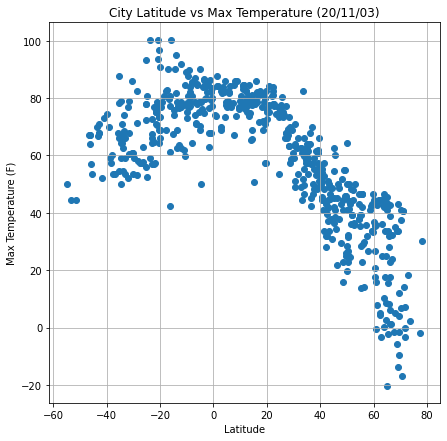

In [61]:
# create a scatter plot latitude v temperature
from datetime import datetime
dt = int(date[0])
plot_date = datetime.fromtimestamp(dt).strftime('%y/%m/%d')
x_lat = city_df['Lat']
y_temp = city_df['Max Temp']
fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(x_lat, y_temp)
plt.title(f"City Latitude vs Max Temperature ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_temp.png")
plt.savefig(file)


#### Latitude vs. Humidity Plot

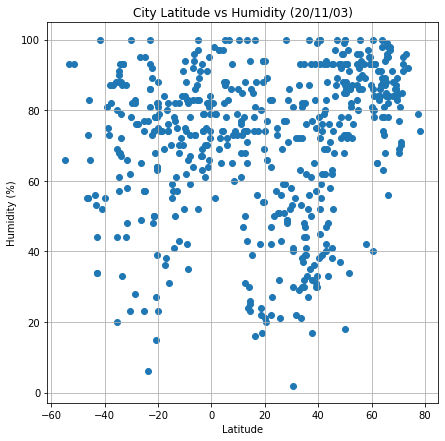

In [62]:
y_hum = city_df["Humidity"]

fig, ax1 = plt.subplots(figsize=(7,7))
ax1.set_autoscale_on(True)
ax1.scatter(x_lat, y_hum)
plt.title(f"City Latitude vs Humidity ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_humid.png")
plt.savefig(file)

#### Latitude vs. Cloudiness Plot

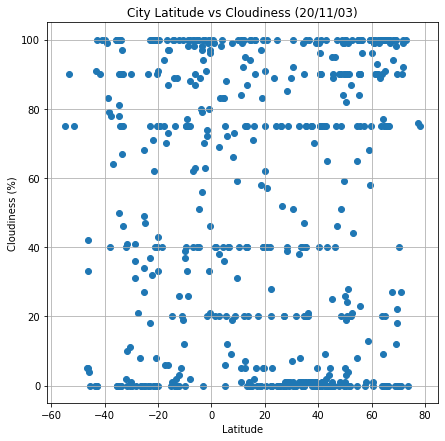

In [63]:
y_cloud = city_df["Cloudiness"]
fig, ax2 = plt.subplots(figsize=(7,7))
ax2.set_autoscale_on(True)
ax2.scatter(x_lat, y_cloud)
plt.title(f"City Latitude vs Cloudiness ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_cloud.png")
plt.savefig(file)

#### Latitude vs. Wind Speed Plot

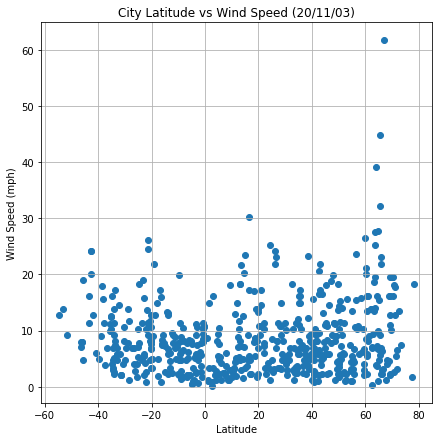

In [64]:
y_wind = city_df["Wind Speed"]
fig, ax3 = plt.subplots(figsize=(7,7))
ax3.set_autoscale_on(True)
ax3.scatter(x_lat, y_wind)
plt.title(f"City Latitude vs Wind Speed ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_wind.png")
plt.savefig(file)

**Linear Regression

In [44]:
# dependencies
import scipy.stats as st

In [41]:
north_df = city_df[city_df["Lat"] >= 0]
north_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gorom-Gorom,100,BF,1604462328,26,14.44,-0.24,81.00,7.05
6,Araouane,83,ML,1604461842,17,18.90,-3.53,78.53,8.70
7,Thompson,90,CA,1604461837,100,55.74,-97.86,23.00,2.24
8,Cayenne,75,GF,1604462329,100,4.93,-52.33,77.00,2.24
11,Ziniaré,95,BF,1604462329,50,12.58,-1.30,75.20,5.35
...,...,...,...,...,...,...,...,...,...
554,Vestmanna,90,FO,1604462988,65,62.16,-7.17,44.60,13.87
556,Batagay-Alyta,27,RU,1604462612,91,67.80,130.41,-1.48,1.23
557,Qasigiannguit,100,GL,1604462989,86,68.82,-51.19,33.80,16.11
558,Alihe,100,CN,1604462989,73,50.57,123.72,26.69,5.70


In [42]:
south_df = city_df[city_df["Lat"] < 0]
south_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Avarua,100,CK,1604461833,78,-21.21,-159.78,75.20,26.22
2,Mataura,42,NZ,1604461798,55,-46.19,168.86,66.99,8.01
3,Mahébourg,40,MU,1604461587,64,-20.41,57.70,73.40,8.05
4,Sorong,100,ID,1604462328,81,-0.88,131.25,82.36,11.39
5,Tuatapere,33,NZ,1604461580,55,-46.13,167.68,66.99,8.01
...,...,...,...,...,...,...,...,...,...
550,Cuamba,1,MZ,1604462988,55,-14.80,36.54,73.99,7.20
555,Port-Gentil,33,GA,1604462988,82,-0.72,8.78,79.36,9.40
559,Port Moresby,40,PG,1604462989,62,-9.44,147.18,87.80,11.41
560,Lüderitz,8,NA,1604462586,95,-26.65,15.16,57.52,6.82


**Northern Hemisphere - Max Temperature vs Latitude

In [111]:
north_x_lat = north_df["Lat"]
north_y_temp = north_df["Max Temp"]

nt_corr_coef = round(st.pearsonr(north_x_lat, north_y_temp)[0],2)
print(f"correlation coefficient: {nt_corr_coef}")

n_temp = st.linregress(north_x_lat, north_y_temp)
print(f"The r-value is {n_temp.rvalue}")


correlation coefficient: -0.88
The r-value is -0.8790645436766039


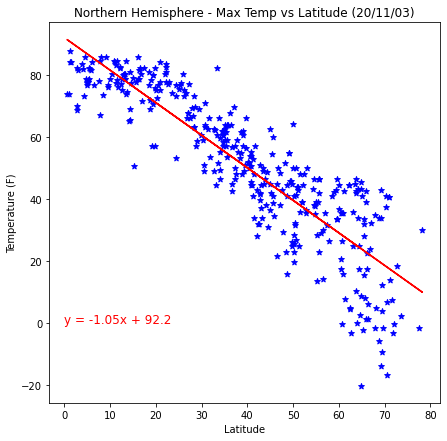

In [124]:
#create equation of line
line = n_temp.slope * north_x_lat + n_temp.intercept
line_eq = f"y = {round(n_temp.slope,2)}x + {round(n_temp.intercept,2)}"

# plot linear model on top of scatter plot
fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(north_x_lat, north_y_temp, marker='*', facecolors="blue", edgecolors="blue")
plt.plot(north_x_lat, line, 'r-')
plt.title(f"Northern Hemisphere - Max Temp vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (0,0), fontsize=12, color="red")

file = os.path.join("images", "north_lat_temp.png")
plt.savefig(file)

**Southern Hemisphere - Max Temperature vs Latitude

In [113]:
south_x_lat = south_df["Lat"]
south_y_temp = south_df["Max Temp"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_temp)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

s_temp = st.linregress(south_x_lat, south_y_temp)
print(f"The r-value is {s_temp.rvalue}")


correlation coefficient: 0.53
The r-value is 0.5317161383225176


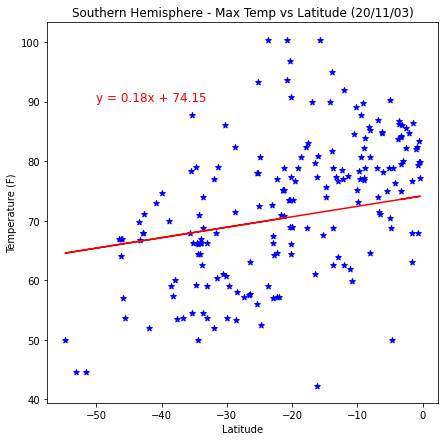

In [125]:
#create equation of line
line = s_slope * south_x_lat + s_intercept
line_eq = f"y = {round(s_slope,2)}x + {round(s_intercept,2)}"

# plot linear model on top of scatter plot
fig, axs = plt.subplots(figsize=(7,7))
axs.set_autoscale_on(True)
axs.scatter(south_x_lat, south_y_temp, marker='*', facecolors="blue", edgecolors="blue")
plt.plot(south_x_lat, line, 'r-')
plt.title(f"Southern Hemisphere - Max Temp vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (-50,90), fontsize=12, color="red")

file = os.path.join("images", "south_lat_temp.png")
plt.savefig(file)

**Northern Hemisphere - Humidity (%) vs Latitude

In [96]:
north_y_hum = north_df["Humidity"]

n_corr_coef = round(st.pearsonr(north_x_lat, north_y_hum)[0],2)
print(f"correlation coefficient: {n_corr_coef}")

n_humid = st.linregress(north_x_lat, north_y_hum)
print(f"The r-value is {n_humid.rvalue}")


correlation coefficient: 0.3
The r-value is 0.29673601664136856


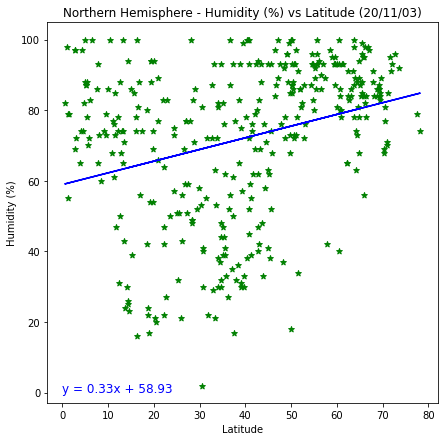

In [81]:
#create equation of line
line = n_slope * north_x_lat + n_intercept
line_eq = f"y = {round(n_slope,2)}x + {round(n_intercept,2)}"

# plot linear model on top of scatter plot
fig, nh = plt.subplots(figsize=(7,7))
nh.set_autoscale_on(True)
nh.scatter(north_x_lat, north_y_hum, marker='*', facecolors="green", edgecolors="green")
plt.plot(north_x_lat, line, 'b-')
plt.title(f"Northern Hemisphere - Humidity (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (0,0), fontsize=12, color="blue")

file = os.path.join("images", "north_lat_humid.png")
plt.savefig(file)

**Southern Hemisphere - Humidity (%) vs Latitude

In [95]:
south_y_hum = south_df["Humidity"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_hum)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

s_humid = st.linregress(south_x_lat, south_y_hum)
print(f"The r-value is {s_humid.rvalue}")


correlation coefficient: 0.12
The r-value is 0.12442375099254133


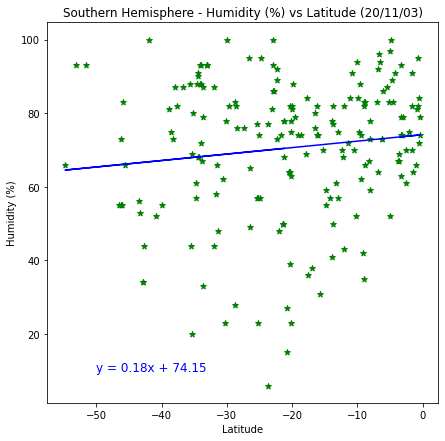

In [128]:
#create equation of line
line = s_slope * south_x_lat + s_intercept
line_eq = f"y = {round(s_slope,2)}x + {round(s_intercept,2)}"

# plot linear model on top of scatter plot
fig, sh = plt.subplots(figsize=(7,7))
sh.set_autoscale_on(True)
sh.scatter(south_x_lat, south_y_hum, marker='*', facecolors="green", edgecolors="green")
plt.plot(south_x_lat, line, 'b-')
plt.title(f"Southern Hemisphere - Humidity (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (-50,10), fontsize=12, color="blue")

file = os.path.join("images", "south_lat_humid.png")
plt.savefig(file)

**Northern Hemisphere - Cloudiness (%) vs Latitude

In [93]:
north_y_cloud = north_df["Cloudiness"]

n_corr_coef = round(st.pearsonr(north_x_lat, north_y_cloud)[0],2)
print(f"correlation coefficient: {n_corr_coef}")

north_cloud = st.linregress(north_x_lat, north_y_cloud)
print(f"The r-value is {north_cloud.rvalue}")

correlation coefficient: 0.16
The r-value is 0.1646969155232774


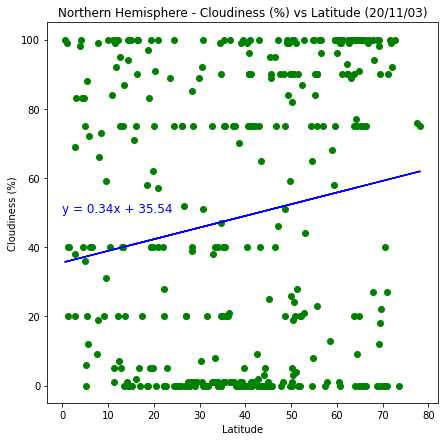

In [134]:
#create equation of line
line = north_cloud.slope * north_x_lat + north_cloud.intercept
line_eq = f"y = {round(north_cloud.slope,2)}x + {round(north_cloud.intercept,2)}"

# plot linear model on top of scatter plot
fig, nc = plt.subplots(figsize=(7,7))
nc.set_autoscale_on(True)
nc.scatter(north_x_lat, north_y_cloud, marker='o', facecolors="green", edgecolors="green")
plt.plot(north_x_lat, line, 'b-')
plt.title(f"Northern Hemisphere - Cloudiness (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (0, 50), fontsize=12, color="blue")

file = os.path.join("images", "north_lat_cloud.png")
plt.savefig(file)

**Southern Hemisphere - Cloudiness (%) vs Latitude

In [94]:
south_y_cloud = south_df["Cloudiness"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_cloud)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

south_cloud = st.linregress(south_x_lat, south_y_cloud)
print(f"The r-value is {south_cloud.rvalue}")

correlation coefficient: 0.16
The r-value is 0.16232283469112258


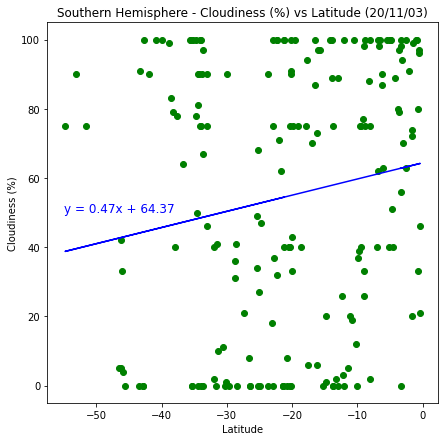

In [135]:
#create equation of line
line = south_cloud.slope * south_x_lat + south_cloud.intercept
line_eq = f"y = {round(south_cloud.slope,2)}x + {round(south_cloud.intercept,2)}"

# plot linear model on top of scatter plot
fig, nc = plt.subplots(figsize=(7,7))
nc.set_autoscale_on(True)
nc.scatter(south_x_lat, south_y_cloud, marker='o', facecolors="green", edgecolors="green")
plt.plot(south_x_lat, line, 'b-')
plt.title(f"Southern Hemisphere - Cloudiness (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (-55, 50), fontsize=12, color="blue")

file = os.path.join("images", "south_lat_cloud.png")
plt.savefig(file)

**Northern Hemisphere - Wind Speed (mph) vs Latitude

In [102]:
north_y_wind = north_df["Wind Speed"]

n_corr_coef = round(st.pearsonr(north_x_lat, north_y_wind)[0],2)
print(f"correlation coefficient: {n_corr_coef}")

north_wind = st.linregress(north_x_lat, north_y_wind)
print(f"The r-value is {north_wind.rvalue}")

correlation coefficient: 0.2
The r-value is 0.20264168802155555


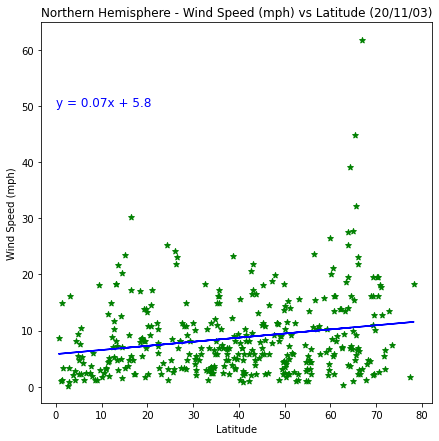

In [103]:
#create equation of line
line = north_wind.slope * north_x_lat + north_wind.intercept
line_eq = f"y = {round(north_wind.slope,2)}x + {round(north_wind.intercept,2)}"

# plot linear model on top of scatter plot
fig, nw = plt.subplots(figsize=(7,7))
nw.set_autoscale_on(True)
nw.scatter(north_x_lat, north_y_wind, marker='*', facecolors="green", edgecolors="green")
plt.plot(north_x_lat, line, 'b-')
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (0, 50), fontsize=12, color="blue")

file = os.path.join("images", "north_lat_wind.png")
plt.savefig(file)

**Southern Hemisphere - Wind Speed (mph) vs Latitude

In [104]:
south_y_wind = south_df["Wind Speed"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_wind)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

south_wind = st.linregress(south_x_lat, south_y_wind)
print(f"The r-value is {south_wind.rvalue}")

correlation coefficient: -0.29
The r-value is -0.2928766976684512


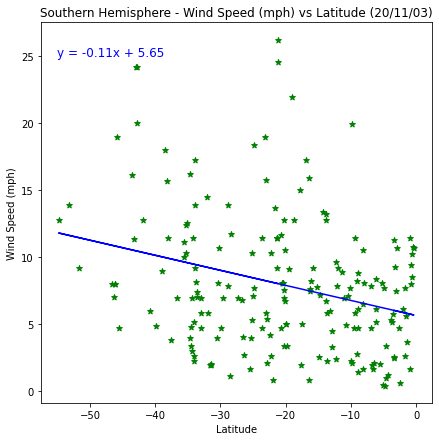

In [106]:
#create equation of line
line = south_wind.slope * south_x_lat + south_wind.intercept
line_eq = f"y = {round(south_wind.slope,2)}x + {round(south_wind.intercept,2)}"

# plot linear model on top of scatter plot
fig, sw = plt.subplots(figsize=(7,7))
sw.set_autoscale_on(True)
sw.scatter(south_x_lat, south_y_wind, marker='*', facecolors="green", edgecolors="green")
plt.plot(south_x_lat, line, 'b-')
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (-55, 25), fontsize=12, color="blue")

file = os.path.join("images", "south_lat_wind.png")
plt.savefig(file)